In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Optional: pretty tables in Jupyter
from IPython.display import display

# Set your path here if different

df = pd.read_csv("C:/Users/alt98/Desktop/cic_research_challenge/cic_challenge_data_set.csv")
# Quick look

display(df.head())
display(pd.DataFrame({"column": df.columns}))

,state_ID,State_,Tot_Pop,Year,Pop_Dist_White,Pop_Dist_Black,Pop_Dist_Hispanic,Pop_Dist_Asian,Pop_Dist_Am_In,Pop_Dist_Nat_Haw_Pac_Isl,...,snap_tot_ben_Mil,SNAP_no_rep,Pov_Ad_Ch,Pov_Ad_No,Pov_Ad_Tot,Ad_Poor_MH_zero,Ad_Poor_MH_four,Ad_Poor_MH_thirteen,Ad_Poor_MH_fourteen,Cov_Vacc_one
0,1,Alabama,5049196,2021,64,26,5,1,0,0,...,1974053519,776479.08,14,15,15,60,12,12,16,1.166205e+08
1,2,Alaska,734420,2021,58,3,7,7,14,2,...,288045258,54650.50,10,11,11,62,14,11,13,6.131410e+08
2,3,Arizona,7274078,2021,52,4,32,3,3,0,...,2175824745,898016.08,12,12,12,61,14,11,14,4.359704e+08
3,4,Arkansas,3026870,2021,68,14,8,1,0,0,...,765794046,249708.75,15,15,15,62,12,10,16,1.145999e+09
4,5,California,39142565,2021,34,5,40,15,0,0,...,11243441465,5217210.83,11,11,11,59,15,12,14,7.499487e+09


,column
0,state_ID
1,State_
2,Tot_Pop
3,Year
4,Pop_Dist_White
5,Pop_Dist_Black
6,Pop_Dist_Hispanic
7,Pop_Dist_Asian
8,Pop_Dist_Am_In
9,Pop_Dist_Nat_Haw_Pac_Isl


In [2]:
# Drop ID and Text/categorical variables
data = df.drop(columns=["state_ID", "State_"], errors="ignore")

# Because Tot_GSP is our target, we need to keep rows that are not null for this specific target. Regardless if they are null elsewhere.
data_clean = data.dropna(subset=["Tot_GSP_Mil"]).copy()

print("Rows in data:", len(data))
print("Rows in data_clean (Tot_GSP_Mil not null):", len(data_clean))
print("Nulls per column (top 10):")
display(data_clean.isna().sum().sort_values(ascending=False).head(10))

Rows in data: 153
Rows in data_clean (Tot_GSP_Mil not null): 153
Nulls per column (top 10):


Cov_Vacc_one                3
Year                        0
Tot_Pop                     0
Pop_Dist_Black              0
Pop_Dist_Hispanic           0
Pop_Dist_Asian              0
Pop_Dist_Am_In              0
Pop_Dist_Nat_Haw_Pac_Isl    0
Pop_Dist_Mult_race          0
Povbr_White                 0
dtype: int64

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# clean the data by dropping n/a values, drop the target variable (because it will correlate with itself)
corrs = (
    data_clean
    .drop(columns=["Tot_GSP_Mil"])
    .corrwith(data_clean["Tot_GSP_Mil"])
    .sort_values(key=abs, ascending=False)
)
display(corrs.to_frame("corr_with_Tot_GSP_Mil").head(20))

# Show the variance inflation factor. This will show what variables are highly correlated with each other. These are not necessarily correlated with the target variable.
X_num = data_clean.drop(columns=["Tot_GSP_Mil"]).select_dtypes(include=[np.number]).dropna()
vif_df = pd.DataFrame({
    "Variable": X_num.columns,
    "VIF": [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]
}).sort_values("VIF", ascending=False)
display(vif_df.head(20))

,corr_with_Tot_GSP_Mil
Tot_Pop,0.974339
snap_tot_ben_Mil,0.965193
SNAP_no_rep,0.961927
Mean_Unempl,0.938048
Pop_Dist_Hispanic,0.543610
Cov_Vacc_one,0.471673
Pop_Dist_White,-0.429386
Pop_Dist_Asian,0.286751
Pop_Dist_Am_In,-0.234882
Pov_Ad_No,-0.168602


,Variable,VIF
1,Year,25758.132846
2,Pop_Dist_White,11787.636744
20,Pov_Ad_Tot,1638.199517
19,Pov_Ad_No,825.390659
4,Pop_Dist_Hispanic,726.487725
3,Pop_Dist_Black,583.283420
22,Ad_Poor_MH_four,305.143228
18,Pov_Ad_Ch,303.394893
9,Povbr_White,217.270047
23,Ad_Poor_MH_thirteen,215.420568


In [4]:
#create a heatmap of the correlation matrix\
corr_matrix = data_clean.select_dtypes(include=[np.number]).corr()

# Show top of the matrix
display(corr_matrix.head())

,Tot_Pop,Year,Pop_Dist_White,Pop_Dist_Black,Pop_Dist_Hispanic,Pop_Dist_Asian,Pop_Dist_Am_In,Pop_Dist_Nat_Haw_Pac_Isl,Pop_Dist_Mult_race,Povbr_White,...,snap_tot_ben_Mil,SNAP_no_rep,Pov_Ad_Ch,Pov_Ad_No,Pov_Ad_Tot,Ad_Poor_MH_zero,Ad_Poor_MH_four,Ad_Poor_MH_thirteen,Ad_Poor_MH_fourteen,Cov_Vacc_one
Tot_Pop,1.000000,5.105100e-03,-0.417630,1.071838e-01,0.534902,0.233311,-2.547488e-01,-0.125778,-0.162127,-0.095475,...,0.967920,9.791099e-01,0.125275,-0.135932,-0.029281,-0.126860,-0.145742,-0.038508,-0.078288,0.522325
Year,0.005105,1.000000e+00,-0.020482,2.863960e-14,0.025420,0.013264,-5.884457e-15,-0.012086,0.022963,-0.046768,...,-0.003043,1.333779e-14,-0.097121,-0.054492,-0.065305,-0.288129,0.154719,0.259873,0.292950,-0.353841
Pop_Dist_White,-0.417630,-2.048178e-02,1.000000,-4.157363e-01,-0.651966,-0.617802,-2.585789e-02,-0.413957,-0.404308,0.165255,...,-0.446749,-4.394070e-01,-0.308943,0.032082,-0.129539,-0.043177,0.015913,-0.105215,0.055353,-0.167376
Pop_Dist_Black,0.107184,2.863960e-14,-0.415736,1.000000e+00,-0.125619,-0.095723,-3.158070e-01,-0.176458,-0.177668,-0.073455,...,0.140488,1.490691e-01,0.398422,0.245488,0.350695,-0.003035,-0.090328,0.110786,0.023705,-0.085635
Pop_Dist_Hispanic,0.534902,2.541989e-02,-0.651966,-1.256190e-01,1.000000,0.232182,8.941356e-02,-0.014756,-0.051239,-0.181345,...,0.514733,5.241517e-01,0.175480,-0.133390,-0.016433,-0.035062,0.018845,0.069837,-0.010778,0.270873


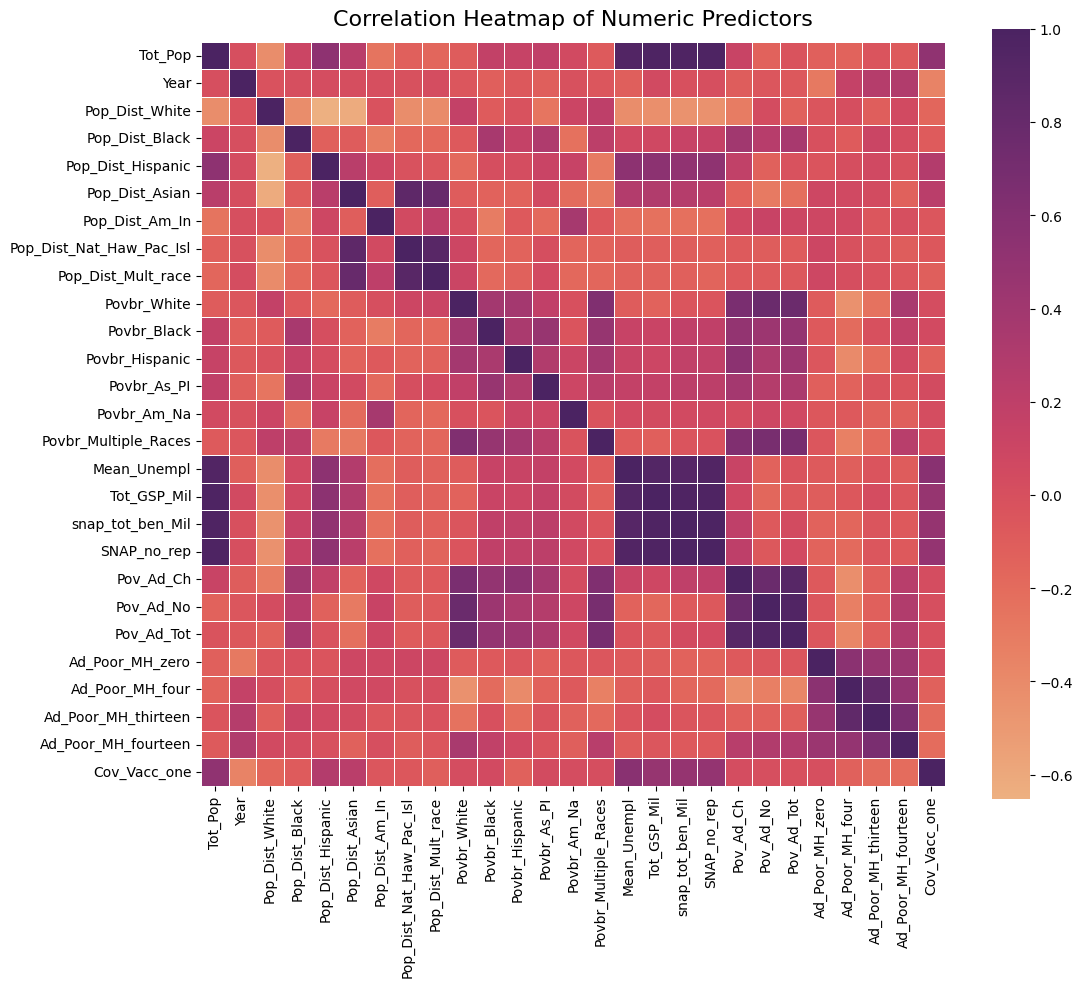

In [5]:
#create a heatmap to visualize the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    cmap="flare",   # <-- use flare color scheme
    annot=False,    # set True to show correlation values
    cbar=True,
    square=True,
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numeric Predictors", fontsize=16, pad=12)
plt.show()

In [6]:
#Based on the VIF/heatmap, choose those predictors that you believe will be the best independant variables for your model (limited to collinearity and encompass the measures of interest)
reduced_predictors = ["Tot_Pop", "Mean_Unempl", "Pov_Ad_Tot", "Ad_Poor_MH_fourteen", "Cov_Vacc_one"]

# Fit OLS model with reduced predictors
X = data_clean[reduced_predictors].fillna(0)
y = data_clean["Tot_GSP_Mil"]

X_const = sm.add_constant(X)
ols_red = sm.OLS(y, X_const).fit()



# Assume X, y already defined
X_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_const).fit()

coef_tbl = pd.DataFrame({
    "Coefficient": ols_model.params,
    "Std_Err": ols_model.bse,
    "t_stat": ols_model.tvalues,
    "p_value": ols_model.pvalues
}).reset_index().rename(columns={"index": "Variable"})

display(coef_tbl)




,Variable,Coefficient,Std_Err,t_stat,p_value
0,const,2120.396235,68098.675933,0.031137,9.752024e-01
1,Tot_Pop,0.070610,0.004489,15.727924,2.607299e-33
2,Mean_Unempl,0.732756,0.183249,3.998699,1.005042e-04
3,Pov_Ad_Tot,-12792.694682,4666.122649,-2.741611,6.873284e-03
4,Ad_Poor_MH_fourteen,8008.070218,4021.289892,1.991418,4.828788e-02
5,Cov_Vacc_one,-0.000039,0.000013,-3.045125,2.756995e-03


The coefficient at this level is acceptable. Even though it is a large number, it is the number that Tot_GSP will sit at if all other variables in the model are 0. Tot_GSP is calculated in the billions of dollars and a baseline of $2120.39 in this light is not concerning. 
R2 is 95 which means that this model does a decent job of describing the variability of Tot_GSP. IE: The other variables in this model do impact Tot_GSP. 

In [7]:

#Run again and edit to reflect the information needed for the second target.
predictors_A = ["Tot_Pop", "Mean_Unempl", "Pov_Ad_Tot", "Ad_Poor_MH_fourteen", "Tot_GSP_Mil"]

X_A = data_clean[predictors_A].fillna(0)
y_A = data_clean["Cov_Vacc_one"].dropna()

# Align indices in case of missing targets
idxA = X_A.index.intersection(y_A.index)
X_A_const = sm.add_constant(X_A.loc[idxA])
y_A = y_A.loc[idxA]

ols_A = sm.OLS(y_A, X_A_const).fit()

coef_tbl_A = pd.DataFrame({
    "Coefficient": ols_A.params,
    "Std_Err": ols_A.bse,
    "t_stat": ols_A.tvalues,
    "p_value": ols_A.pvalues
}).reset_index().rename(columns={"index": "Variable"})

display(coef_tbl_A)



,Variable,Coefficient,Std_Err,t_stat,p_value
0,const,7.496898e+08,4.337761e+08,1.728288,0.086080
1,Tot_Pop,9.732371e+01,4.610500e+01,2.110915,0.036508
2,Mean_Unempl,4.405620e+03,1.171160e+03,3.761758,0.000245
3,Pov_Ad_Tot,6.109678e+06,3.040418e+07,0.200949,0.841022
4,Ad_Poor_MH_fourteen,-4.323444e+07,2.589367e+07,-1.669691,0.097153
5,Tot_GSP_Mil,-1.518158e+03,5.089082e+02,-2.983166,0.003352


This model doesn't show much signifigance in regard to covid vaccine uptake. The R2 is low showing the other variables have little impact on vaccine uptake. The P value overall is unimpressive at 0.07.  What is interesting though is the p value for Ad_Poor_Mental_Health is showing quite a bit of signifigance. > 14 days of reported bad mental health experiences within a month correlates with reduced vaccine uptake (negative coefficient)

In [8]:
predictors_B = ["Tot_Pop", "Mean_Unempl", "Pov_Ad_Tot", "Cov_Vacc_one", "Tot_GSP_Mil"]

X_B = data_clean[predictors_B].fillna(0)
y_B = data_clean["Ad_Poor_MH_fourteen"].dropna()

# Align indices in case of missing targets
idxB = X_B.index.intersection(y_B.index)
X_B_const = sm.add_constant(X_B.loc[idxB])
y_B = y_B.loc[idxB]

ols_B = sm.OLS(y_B, X_B_const).fit()

coef_tbl_B = pd.DataFrame({
    "Coefficient": ols_B.params,
    "Std_Err": ols_B.bse,
    "t_stat": ols_B.tvalues,
    "p_value": ols_B.pvalues
}).reset_index().rename(columns={"index": "Variable"})

display(coef_tbl_B)


,Variable,Coefficient,Std_Err,t_stat,p_value
0,const,9.741978e+00,1.119830e+00,8.699516,6.157827e-15
1,Tot_Pop,-1.908095e-07,1.479928e-07,-1.289317,1.993130e-01
2,Mean_Unempl,-3.506021e-06,3.894606e-06,-0.900225,3.694730e-01
3,Pov_Ad_Tot,3.953353e-01,9.116781e-02,4.336348,2.675633e-05
4,Cov_Vacc_one,-4.169597e-10,2.624600e-10,-1.588660,1.142856e-01
5,Tot_GSP_Mil,3.280339e-06,1.647237e-06,1.991418,4.828788e-02


This model shows a weak relationship between Ad_Poor_MH_fourteen and the other variables (r2). However, the coefficient of 9 bad mental health days is reasonable to expect because the variable itself measure >14 bad mental health days. P-value shows that our study shows some signifigance but due to the r2 much of that may be due to unkowns.
Pov_Ad_Tot was significantly correlated with elevated number of bad mental health days meaning that poverty can influence how many bad mental health days a person experiences. Also Tot_GSP has a signifigant postive correlation at p>0.05 but the coefficient is minute. Meaning the difference most likely can't be coherently broken down into $ increments.

In [9]:

#run more ols regression with scaled variables to see if there is any difference. 

from sklearn.preprocessing import StandardScaler

# Define reduced predictor sets for comparison
predictors_reduced = ["Tot_Pop", "Mean_Unempl", "Pov_Ad_Tot", "Ad_Poor_MH_fourteen", "Cov_Vacc_one"]

X = data_clean[predictors_reduced].fillna(0)
y = data_clean["Tot_GSP_Mil"]

# Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Means after scaling:", X_scaled.mean(axis=0))
print("Standard deviations after scaling:", X_scaled.std(axis=0))

Means after scaling: [ 7.98199560e-18 -1.16101754e-17 -2.14788245e-16  6.96610525e-17
  0.00000000e+00]
Standard deviations after scaling: [1. 1. 1. 1. 1.]


In [11]:
# Add intercept manually since sklearn scaling removed mean
X_scaled_const = sm.add_constant(X_scaled)
ols_std = sm.OLS(y, X_scaled_const).fit()


The output doesn't vary in any noticeable way from the unscaled regression model run earlier. We can continue on to run the LASSOCV with cross validation.

Optimal alpha: 3852.0067208037112

LASSO Coefficients:
Tot_Pop                520827.001075
Mean_Unempl            128291.703786
Pov_Ad_Tot             -26310.211196
Ad_Poor_MH_fourteen     18449.121461
Cov_Vacc_one           -32983.829204
dtype: float64


<Axes: title={'center': 'LASSO Coefficients'}>

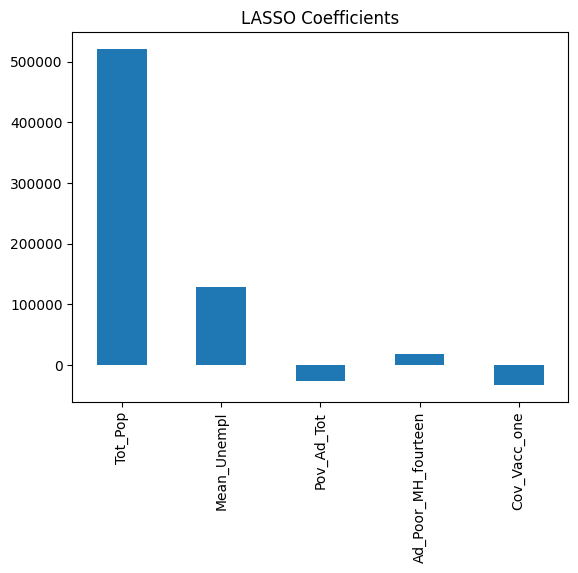

In [12]:
from sklearn.linear_model import LassoCV


predictors_reduced = ["Tot_Pop", "Mean_Unempl", "Pov_Ad_Tot", "Ad_Poor_MH_fourteen", "Cov_Vacc_one",]

# Cross-validated LASSO
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)

# Coefficients
coef_lasso = pd.Series(lasso.coef_, index=predictors_reduced)
print("Optimal alpha:", lasso.alpha_)
print("\nLASSO Coefficients:")
print(coef_lasso)

# Show which coefficients survive shrinkage
coef_lasso.plot(kind="bar", title="LASSO Coefficients")


None of the coefficients shrank to zero and are confirmed as viable features to use in the regression models. 

Optimal alpha: 3852.0067208037112

LASSO Coefficients:
Tot_Pop                520827.001075
Mean_Unempl            128291.703786
Pov_Ad_Tot             -26310.211196
Ad_Poor_MH_fourteen     18449.121461
Tot_GSP_Mil            -32983.829204
dtype: float64


<Axes: title={'center': 'LASSO Coefficients'}>

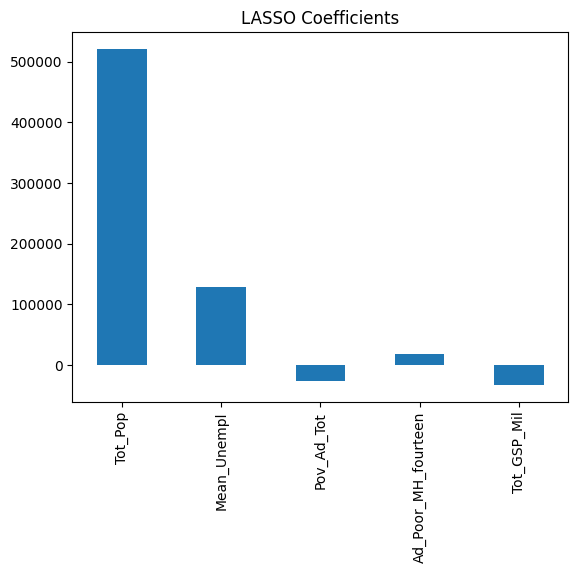

In [ ]:

predictors_reduced = ["Tot_Pop", "Mean_Unempl", "Pov_Ad_Tot", "Ad_Poor_MH_fourteen", "Tot_GSP_Mil"]
# Cross-validated LASSO
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)

# Coefficients
coef_lasso = pd.Series(lasso.coef_, index=predictors_reduced)
print("Optimal alpha:", lasso.alpha_)
print("\nLASSO Coefficients:")
print(coef_lasso)

# Show which coefficients survive shrinkage
coef_lasso.plot(kind="bar", title="LASSO Coefficients")

Optimal alpha: 3852.0067208037112

LASSO Coefficients:
Tot_Pop         520827.001075
Mean_Unempl     128291.703786
Pov_Ad_Tot      -26310.211196
Cov_Vacc_one     18449.121461
Tot_GSP_Mil     -32983.829204
dtype: float64


<Axes: title={'center': 'LASSO Coefficients'}>

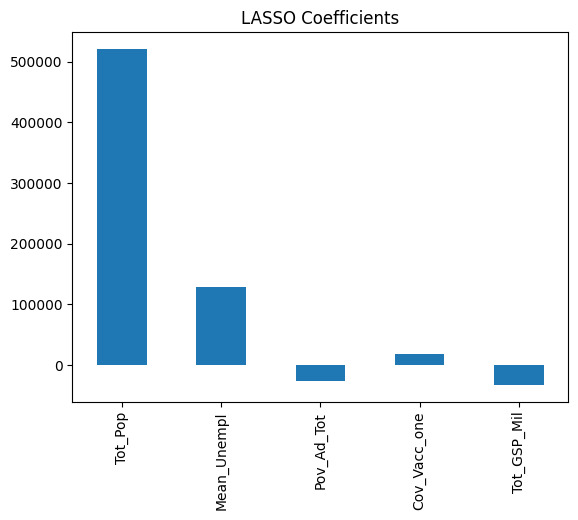

In [ ]:
#another one for Ad_Poor_MH_fourteen for posterity

predictors_reduced = ["Tot_Pop", "Mean_Unempl", "Pov_Ad_Tot", "Cov_Vacc_one", "Tot_GSP_Mil"]
# Cross-validated LASSO
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)

# Coefficients
coef_lasso = pd.Series(lasso.coef_, index=predictors_reduced)
print("Optimal alpha:", lasso.alpha_)
print("\nLASSO Coefficients:")
print(coef_lasso)


# Show which coefficients survive shrinkage
coef_lasso.plot(kind="bar", title="LASSO Coefficients")

Now, let's compare and see if there is a difference between the R2 of OLS and Lasso for each Target Variable. 

In [ ]:
from sklearn.metrics import r2_score

# Dictionary to collect results
results = []

# Loop over your target variables
targets = ["Cov_Vacc_one", "Tot_GSP_Mil", "Ad_Poor_MH_fourteen"]

for target in targets:
    # Prepare predictors (drop the target if it's in X)
    predictors = [col for col in predictors_reduced if col != target]
    
    X = data_clean[predictors].fillna(0)
    y = data_clean[target].dropna()
    
    # Align indices if NaNs
    idx = X.index.intersection(y.index)
    X = X.loc[idx]
    y = y.loc[idx]
    
    # Standardize
  
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # --- OLS ---
    X_scaled_const = sm.add_constant(X_scaled)
    ols_model = sm.OLS(y, X_scaled_const).fit()
    ols_pred = ols_model.predict(X_scaled_const)
    r2_ols = r2_score(y, ols_pred)
    
    # --- LASSO ---
   
    lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)
    lasso_pred = lasso.predict(X_scaled)
    r2_lasso = r2_score(y, lasso_pred)
    
    # Save results
    results.append({
        "Target": target,
        "R2_OLS": r2_ols,
        "R2_LASSO": r2_lasso,
        "LASSO_alpha": lasso.alpha_
    })

# Convert to table
comparison_table = pd.DataFrame(results)
display(comparison_table)


,Target,R2_OLS,R2_LASSO,LASSO_alpha
0,Cov_Vacc_one,0.368347,0.313383,6.884421e+07
1,Tot_GSP_Mil,0.957124,0.950134,2.913902e+04
2,Ad_Poor_MH_fourteen,0.153734,0.150151,1.779515e-02


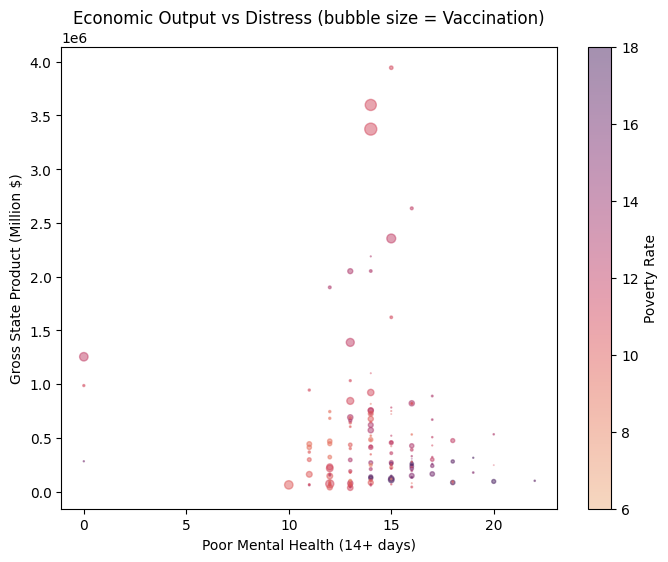

In [ ]:
#bubble chart showing
plt.figure(figsize=(8,6))
plt.scatter(
    data_clean["Ad_Poor_MH_fourteen"],
    data_clean["Tot_GSP_Mil"],
    s=data_clean["Cov_Vacc_one"]/1e8,  # scale bubble size
    alpha=0.5, c=data_clean["Pov_Ad_Tot"], cmap="flare"
)
plt.xlabel("Poor Mental Health (14+ days)")
plt.ylabel("Gross State Product (Million $)")
plt.title("Economic Output vs Distress (bubble size = Vaccination)")
plt.colorbar(label="Poverty Rate")
plt.show()


C:\Users\alt98\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\alt98\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\alt98\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\alt98\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\axisgrid.py:1513: UserWarning: 

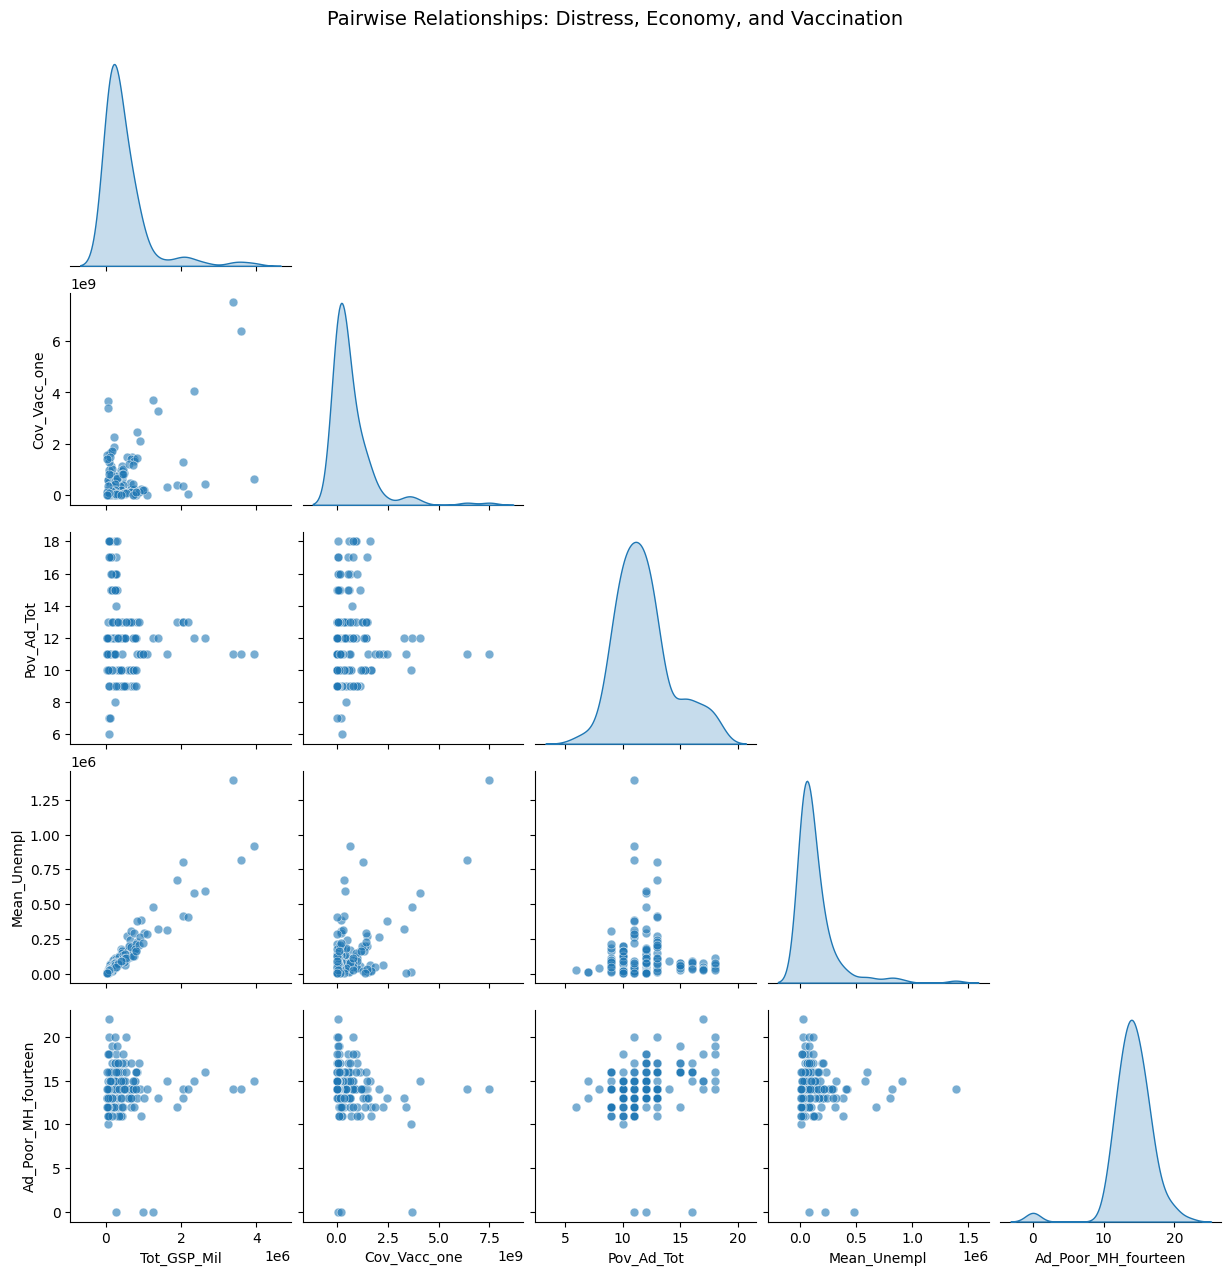

In [ ]:
subset = data_clean[[
    "Tot_GSP_Mil",         # economic
    "Cov_Vacc_one",        # vaccination
    "Pov_Ad_Tot",          # poverty (distress)
    "Mean_Unempl",         # unemployment (distress/economic)
    "Ad_Poor_MH_fourteen"  # mental health distress
]]

# Pairplot with flare palette
sns.pairplot(
    subset,
    diag_kind="kde",
    corner=True,
    palette="flare",   # <-- flare color scheme
    plot_kws={"alpha":0.6, "s":40}
)

plt.suptitle("Pairwise Relationships: Distress, Economy, and Vaccination", y=1.02, fontsize=14)
plt.show()

In [ ]:
#now let's make a map of SNAP and Mental Health by State by Year
#import new csv with longitudinal centroids
long = pd.read_csv("C:/Users/alt98/Desktop/cic_research_challenge/cic_challenge_data_set_lat_long.csv")
long.head()

,state_ID,State_,Tot_Pop,Year,Pop_Dist_White,Pop_Dist_Black,Pop_Dist_Hispanic,Pop_Dist_Asian,Pop_Dist_Am_In,Pop_Dist_Nat_Haw_Pac_Isl,...,Pov_Ad_Ch,Pov_Ad_No,Pov_Ad_Tot,Ad_Poor_MH_zero,Ad_Poor_MH_four,Ad_Poor_MH_thirteen,Ad_Poor_MH_fourteen,Cov_Vacc_one,Latitude,Longitude
0,1,Alabama,5049196,2021,64,26,5,1,0,0,...,14,15,15,60,12,12,16,1.166205e+08,32.806671,-86.791130
1,2,Alaska,734420,2021,58,3,7,7,14,2,...,10,11,11,62,14,11,13,6.131410e+08,61.370716,-152.404419
2,3,Arizona,7274078,2021,52,4,32,3,3,0,...,12,12,12,61,14,11,14,4.359704e+08,33.729759,-111.431221
3,4,Arkansas,3026870,2021,68,14,8,1,0,0,...,15,15,15,62,12,10,16,1.145999e+09,34.969704,-92.373123
4,5,California,39142565,2021,34,5,40,15,0,0,...,11,11,11,59,15,12,14,7.499487e+09,36.116203,-119.681564


In [ ]:
#create a new column for the percentage of people who received SNAP benefits
long["SNAP_pct"] = (long["SNAP_no_rep"] / long["Tot_Pop"]) * 100
print(long.columns)

Index(['state_ID', 'State_', 'Tot_Pop', 'Year', 'Pop_Dist_White',
       'Pop_Dist_Black', 'Pop_Dist_Hispanic', 'Pop_Dist_Asian',
       'Pop_Dist_Am_In', 'Pop_Dist_Nat_Haw_Pac_Isl', 'Pop_Dist_Mult_race',
       'Povbr_White', 'Povbr_Black', 'Povbr_Hispanic', 'Povbr_As_PI',
       'Povbr_Am_Na', 'Povbr_Multiple_Races', 'Mean_Unempl', 'Tot_GSP_Mil',
       'snap_tot_ben_Mil', 'SNAP_no_rep', 'Pov_Ad_Ch', 'Pov_Ad_No',
       'Pov_Ad_Tot', 'Ad_Poor_MH_zero', 'Ad_Poor_MH_four',
       'Ad_Poor_MH_thirteen', 'Ad_Poor_MH_fourteen', 'Cov_Vacc_one',
       'Latitude', 'Longitude', 'SNAP_pct'],
      dtype='object')


In [ ]:
import folium
import pandas as pd
import numpy as np
import branca.colormap as cm
from IPython.display import display

# =========================
# CONFIG (tweak as desired)
# =========================
year = 2021
OFFSET_DEG = 0.30            # east/west separation of the two bubbles
SIZE_MIN, SIZE_MAX = 5, 25   # marker radius scaling (px)
SNAP_FILL_OPACITY = 0.50
MH_FILL_OPACITY   = 0.50
STROKE_COLOR = "#777"
STROKE_WEIGHT = 0.6
MH_GAMMA = 0.6               # <1 makes high values pop more; >1 emphasizes lows
MAP_HEIGHT = 620
SAVE_NAME = f"bubble_map_{year}_with_legends.html"

# =========================
# DATA PREP
# Assumes a df named `long` is in memory
# =========================
cols_needed = ["State_", "Latitude", "Longitude", "SNAP_no_rep", "Ad_Poor_MH_fourteen"]
opt_cols = ["Tot_Pop"]
use_cols = ["Year"] + cols_needed + [c for c in opt_cols if c in getattr(long, "columns", [])]

long_year = (
    long.loc[:, use_cols]
        .query("Year == @year")
        .drop_duplicates()
        .copy()
)

# Ensure numeric
for c in ["Latitude","Longitude","SNAP_no_rep","Ad_Poor_MH_fourteen","Tot_Pop"]:
    if c in long_year.columns:
        long_year[c] = pd.to_numeric(long_year[c], errors="coerce")

long_year = long_year.dropna(subset=["Latitude","Longitude","SNAP_no_rep","Ad_Poor_MH_fourteen"])

# Optional: percent of population on SNAP
if "Tot_Pop" in long_year.columns and long_year["Tot_Pop"].notna().any():
    long_year["SNAP_pct"] = (long_year["SNAP_no_rep"] / long_year["Tot_Pop"]) * 100

# =========================
# SCALERS
# =========================
def scale_radius(series, rmin=SIZE_MIN, rmax=SIZE_MAX):
    smin, smax = float(series.min()), float(series.max())
    if smin == smax:
        return pd.Series([(rmin + rmax)/2] * len(series), index=series.index)
    return ((series - smin) / (smax - smin)) * (rmax - rmin) + rmin

long_year["snap_size"] = scale_radius(long_year["SNAP_no_rep"])
long_year["mh_size"]   = scale_radius(long_year["Ad_Poor_MH_fourteen"])

# =========================
# COLOR MAPS
# =========================
# Mental Health (purple–pink) with gamma contrast
mh_min, mh_max = long_year["Ad_Poor_MH_fourteen"].min(), long_year["Ad_Poor_MH_fourteen"].max()
mh_linear = cm.linear.RdPu_09.scale(mh_min, mh_max)

def mh_color(v):
    if mh_max == mh_min:
        return mh_linear(mh_min)
    t = (v - mh_min) / (mh_max - mh_min)
    t_gamma = t ** MH_GAMMA
    v_gamma = mh_min + t_gamma * (mh_max - mh_min)
    return mh_linear(v_gamma)

# SNAP blue gradient (raw recipients). To use SNAP_pct instead, change column below.
snap_series_for_color = long_year["SNAP_no_rep"]
snap_min, snap_max = snap_series_for_color.min(), snap_series_for_color.max()
snap_linear = cm.linear.Blues_09.scale(snap_min, snap_max)

# =========================
# MAP
# =========================
m = folium.Map(
    location=[long_year["Latitude"].mean(), long_year["Longitude"].mean()],
    zoom_start=4,
    scrollWheelZoom=False,
    width="100%",
    height=MAP_HEIGHT
)

# Plot bubbles (SNAP west/left, MH east/right)
for _, row in long_year.iterrows():
    lat, lon = row["Latitude"], row["Longitude"]

    # SNAP bubble (size + blue gradient color)
    folium.CircleMarker(
        location=[lat, lon - OFFSET_DEG],
        radius=row["snap_size"],
        popup=(
            f"<b>{row['State_']} (SNAP)</b><br>"
            f"Recipients: {row['SNAP_no_rep']:.0f}"
            + (f"<br>% of pop: {row['SNAP_pct']:.1f}%" if 'SNAP_pct' in row and pd.notna(row['SNAP_pct']) else "")
        ),
        color=STROKE_COLOR,
        weight=STROKE_WEIGHT,
        fill=True,
        fill_color=snap_linear(row["SNAP_no_rep"]),  # or snap_linear(row["SNAP_pct"]) if using %
        fill_opacity=SNAP_FILL_OPACITY,
    ).add_to(m)

    # Mental Health bubble (size + purple–pink gamma color)
    folium.CircleMarker(
        location=[lat, lon + OFFSET_DEG],
        radius=row["mh_size"],
        popup=(f"<b>{row['State_']} (Ad_Poor_MH_14)</b><br>"
               f"Value: {row['Ad_Poor_MH_fourteen']}"),
        color=STROKE_COLOR,
        weight=STROKE_WEIGHT,
        fill=True,
        fill_color=mh_color(row["Ad_Poor_MH_fourteen"]),
        fill_opacity=MH_FILL_OPACITY,
    ).add_to(m)

# =========================
# LEGENDS
# =========================
snap_linear.caption = "SNAP recipients"
snap_linear.position = 'topright'
m.add_child(snap_linear)

mh_linear.caption = "Ad_Poor_MH_fourteen"
mh_linear.position = 'topright'
m.add_child(mh_linear)



# 2) Combined SNAP legend (colorbar + size) under the MH bar
def fmt(n): return f"{n:,.0f}"

# radii for min/median/max (same scaling as markers)
snap_min_v = float(long_year["SNAP_no_rep"].min())
snap_med_v = float(long_year["SNAP_no_rep"].median())
snap_max_v = float(long_year["SNAP_no_rep"].max())

r_min = float(scale_radius(pd.Series([snap_min_v])).iloc[0])
r_med = float(scale_radius(pd.Series([snap_med_v])).iloc[0])
r_max = float(scale_radius(pd.Series([snap_max_v])).iloc[0])

# dynamic height so circles never clip
svg_height = int(30 + 2*r_max + 15 + 2*r_med + 15 + 2*r_min)

# CSS gradient from the snap colormap (fallback if .colors absent)
snap_colors = getattr(snap_linear, "colors", None)
if not snap_colors:
    snap_colors = ["#09ec7a","#0DC45F","#048b4a","#9ecae1","#6baed6",
                   "#4292c6","#2171b5","#08519c","#08306b"]
stops = ", ".join(
    f"{c} {int(i/(len(snap_colors)-1)*100)}%"
    for i, c in enumerate(snap_colors)
)




# =========================
# OUTPUT
# =========================
                # Inline (trust the notebook in VS Code)
m.save(SAVE_NAME)          # Always saves a standalone HTML
print("Saved:", SAVE_NAME)

display(m) 


Saved: bubble_map_2021_with_legends.html


In [ ]:
year = 2022
OFFSET_DEG = 0.30            # east/west separation of the two bubbles
SIZE_MIN, SIZE_MAX = 5, 25   # marker radius scaling (px)
SNAP_FILL_OPACITY = 0.50
MH_FILL_OPACITY   = 0.50
STROKE_COLOR = "#777"
STROKE_WEIGHT = 0.6
MH_GAMMA = 0.6               # <1 makes high values pop more; >1 emphasizes lows
MAP_HEIGHT = 620
SAVE_NAME = f"bubble_map_{year}_with_legends.html"

# =========================
# DATA PREP
# Assumes a df named `long` is in memory
# =========================
cols_needed = ["State_", "Latitude", "Longitude", "SNAP_no_rep", "Ad_Poor_MH_fourteen"]
opt_cols = ["Tot_Pop"]
use_cols = ["Year"] + cols_needed + [c for c in opt_cols if c in getattr(long, "columns", [])]

long_year = (
    long.loc[:, use_cols]
        .query("Year == @year")
        .drop_duplicates()
        .copy()
)

# Ensure numeric
for c in ["Latitude","Longitude","SNAP_no_rep","Ad_Poor_MH_fourteen","Tot_Pop"]:
    if c in long_year.columns:
        long_year[c] = pd.to_numeric(long_year[c], errors="coerce")

long_year = long_year.dropna(subset=["Latitude","Longitude","SNAP_no_rep","Ad_Poor_MH_fourteen"])

# Optional: percent of population on SNAP
if "Tot_Pop" in long_year.columns and long_year["Tot_Pop"].notna().any():
    long_year["SNAP_pct"] = (long_year["SNAP_no_rep"] / long_year["Tot_Pop"]) * 100

# =========================
# SCALERS
# =========================
def scale_radius(series, rmin=SIZE_MIN, rmax=SIZE_MAX):
    smin, smax = float(series.min()), float(series.max())
    if smin == smax:
        return pd.Series([(rmin + rmax)/2] * len(series), index=series.index)
    return ((series - smin) / (smax - smin)) * (rmax - rmin) + rmin

long_year["snap_size"] = scale_radius(long_year["SNAP_no_rep"])
long_year["mh_size"]   = scale_radius(long_year["Ad_Poor_MH_fourteen"])

# =========================
# COLOR MAPS
# =========================
# Mental Health (purple–pink) with gamma contrast
mh_min, mh_max = long_year["Ad_Poor_MH_fourteen"].min(), long_year["Ad_Poor_MH_fourteen"].max()
mh_linear = cm.linear.RdPu_09.scale(mh_min, mh_max)

def mh_color(v):
    if mh_max == mh_min:
        return mh_linear(mh_min)
    t = (v - mh_min) / (mh_max - mh_min)
    t_gamma = t ** MH_GAMMA
    v_gamma = mh_min + t_gamma * (mh_max - mh_min)
    return mh_linear(v_gamma)

# SNAP blue gradient (raw recipients). To use SNAP_pct instead, change column below.
snap_series_for_color = long_year["SNAP_no_rep"]
snap_min, snap_max = snap_series_for_color.min(), snap_series_for_color.max()
snap_linear = cm.linear.Blues_09.scale(snap_min, snap_max)

# =========================
# MAP
# =========================
m = folium.Map(
    location=[long_year["Latitude"].mean(), long_year["Longitude"].mean()],
    zoom_start=4,
    scrollWheelZoom=False,
    width="100%",
    height=MAP_HEIGHT
)

# Plot bubbles (SNAP west/left, MH east/right)
for _, row in long_year.iterrows():
    lat, lon = row["Latitude"], row["Longitude"]

    # SNAP bubble (size + blue gradient color)
    folium.CircleMarker(
        location=[lat, lon - OFFSET_DEG],
        radius=row["snap_size"],
        popup=(
            f"<b>{row['State_']} (SNAP)</b><br>"
            f"Recipients: {row['SNAP_no_rep']:.0f}"
            + (f"<br>% of pop: {row['SNAP_pct']:.1f}%" if 'SNAP_pct' in row and pd.notna(row['SNAP_pct']) else "")
        ),
        color=STROKE_COLOR,
        weight=STROKE_WEIGHT,
        fill=True,
        fill_color=snap_linear(row["SNAP_no_rep"]),  # or snap_linear(row["SNAP_pct"]) if using %
        fill_opacity=SNAP_FILL_OPACITY,
    ).add_to(m)

    # Mental Health bubble (size + purple–pink gamma color)
    folium.CircleMarker(
        location=[lat, lon + OFFSET_DEG],
        radius=row["mh_size"],
        popup=(f"<b>{row['State_']} (Ad_Poor_MH_14)</b><br>"
               f"Value: {row['Ad_Poor_MH_fourteen']}"),
        color=STROKE_COLOR,
        weight=STROKE_WEIGHT,
        fill=True,
        fill_color=mh_color(row["Ad_Poor_MH_fourteen"]),
        fill_opacity=MH_FILL_OPACITY,
    ).add_to(m)

# =========================
# LEGENDS
# =========================
snap_linear.caption = "SNAP recipients"
snap_linear.position = 'topright'
m.add_child(snap_linear)

mh_linear.caption = "Ad_Poor_MH_fourteen"
mh_linear.position = 'topright'
m.add_child(mh_linear)



# 2) Combined SNAP legend (colorbar + size) under the MH bar
def fmt(n): return f"{n:,.0f}"

# radii for min/median/max (same scaling as markers)
snap_min_v = float(long_year["SNAP_no_rep"].min())
snap_med_v = float(long_year["SNAP_no_rep"].median())
snap_max_v = float(long_year["SNAP_no_rep"].max())

r_min = float(scale_radius(pd.Series([snap_min_v])).iloc[0])
r_med = float(scale_radius(pd.Series([snap_med_v])).iloc[0])
r_max = float(scale_radius(pd.Series([snap_max_v])).iloc[0])

# dynamic height so circles never clip
svg_height = int(30 + 2*r_max + 15 + 2*r_med + 15 + 2*r_min)

# CSS gradient from the snap colormap (fallback if .colors absent)
snap_colors = getattr(snap_linear, "colors", None)
if not snap_colors:
    snap_colors = ["#09ec7a","#0DC45F","#048b4a","#9ecae1","#6baed6",
                   "#4292c6","#2171b5","#08519c","#08306b"]
stops = ", ".join(
    f"{c} {int(i/(len(snap_colors)-1)*100)}%"
    for i, c in enumerate(snap_colors)
)




# =========================
# OUTPUT
# =========================
                # Inline (trust the notebook in VS Code)
m.save(SAVE_NAME)          # Always saves a standalone HTML
print("Saved:", SAVE_NAME)

display(m) 


Saved: bubble_map_2022_with_legends.html


In [ ]:
year = 2023
OFFSET_DEG = 0.30            # east/west separation of the two bubbles
SIZE_MIN, SIZE_MAX = 5, 25   # marker radius scaling (px)
SNAP_FILL_OPACITY = 0.50
MH_FILL_OPACITY   = 0.50
STROKE_COLOR = "#777"
STROKE_WEIGHT = 0.6
MH_GAMMA = 0.6               # <1 makes high values pop more; >1 emphasizes lows
MAP_HEIGHT = 620
SAVE_NAME = f"bubble_map_{year}_with_legends.html"

# =========================
# DATA PREP
# Assumes a df named `long` is in memory
# =========================
cols_needed = ["State_", "Latitude", "Longitude", "SNAP_no_rep", "Ad_Poor_MH_fourteen"]
opt_cols = ["Tot_Pop"]
use_cols = ["Year"] + cols_needed + [c for c in opt_cols if c in getattr(long, "columns", [])]

long_year = (
    long.loc[:, use_cols]
        .query("Year == @year")
        .drop_duplicates()
        .copy()
)

# Ensure numeric
for c in ["Latitude","Longitude","SNAP_no_rep","Ad_Poor_MH_fourteen","Tot_Pop"]:
    if c in long_year.columns:
        long_year[c] = pd.to_numeric(long_year[c], errors="coerce")

long_year = long_year.dropna(subset=["Latitude","Longitude","SNAP_no_rep","Ad_Poor_MH_fourteen"])

# Optional: percent of population on SNAP
if "Tot_Pop" in long_year.columns and long_year["Tot_Pop"].notna().any():
    long_year["SNAP_pct"] = (long_year["SNAP_no_rep"] / long_year["Tot_Pop"]) * 100

# =========================
# SCALERS
# =========================
def scale_radius(series, rmin=SIZE_MIN, rmax=SIZE_MAX):
    smin, smax = float(series.min()), float(series.max())
    if smin == smax:
        return pd.Series([(rmin + rmax)/2] * len(series), index=series.index)
    return ((series - smin) / (smax - smin)) * (rmax - rmin) + rmin

long_year["snap_size"] = scale_radius(long_year["SNAP_no_rep"])
long_year["mh_size"]   = scale_radius(long_year["Ad_Poor_MH_fourteen"])

# =========================
# COLOR MAPS
# =========================
# Mental Health (purple–pink) with gamma contrast
mh_min, mh_max = long_year["Ad_Poor_MH_fourteen"].min(), long_year["Ad_Poor_MH_fourteen"].max()
mh_linear = cm.linear.RdPu_09.scale(mh_min, mh_max)

def mh_color(v):
    if mh_max == mh_min:
        return mh_linear(mh_min)
    t = (v - mh_min) / (mh_max - mh_min)
    t_gamma = t ** MH_GAMMA
    v_gamma = mh_min + t_gamma * (mh_max - mh_min)
    return mh_linear(v_gamma)

# SNAP blue gradient (raw recipients). To use SNAP_pct instead, change column below.
snap_series_for_color = long_year["SNAP_no_rep"]
snap_min, snap_max = snap_series_for_color.min(), snap_series_for_color.max()
snap_linear = cm.linear.Blues_09.scale(snap_min, snap_max)

# =========================
# MAP
# =========================
m = folium.Map(
    location=[long_year["Latitude"].mean(), long_year["Longitude"].mean()],
    zoom_start=4,
    scrollWheelZoom=False,
    width="100%",
    height=MAP_HEIGHT
)

# Plot bubbles (SNAP west/left, MH east/right)
for _, row in long_year.iterrows():
    lat, lon = row["Latitude"], row["Longitude"]

    # SNAP bubble (size + blue gradient color)
    folium.CircleMarker(
        location=[lat, lon - OFFSET_DEG],
        radius=row["snap_size"],
        popup=(
            f"<b>{row['State_']} (SNAP)</b><br>"
            f"Recipients: {row['SNAP_no_rep']:.0f}"
            + (f"<br>% of pop: {row['SNAP_pct']:.1f}%" if 'SNAP_pct' in row and pd.notna(row['SNAP_pct']) else "")
        ),
        color=STROKE_COLOR,
        weight=STROKE_WEIGHT,
        fill=True,
        fill_color=snap_linear(row["SNAP_no_rep"]),  # or snap_linear(row["SNAP_pct"]) if using %
        fill_opacity=SNAP_FILL_OPACITY,
    ).add_to(m)

    # Mental Health bubble (size + purple–pink gamma color)
    folium.CircleMarker(
        location=[lat, lon + OFFSET_DEG],
        radius=row["mh_size"],
        popup=(f"<b>{row['State_']} (Ad_Poor_MH_14)</b><br>"
               f"Value: {row['Ad_Poor_MH_fourteen']}"),
        color=STROKE_COLOR,
        weight=STROKE_WEIGHT,
        fill=True,
        fill_color=mh_color(row["Ad_Poor_MH_fourteen"]),
        fill_opacity=MH_FILL_OPACITY,
    ).add_to(m)

# =========================
# LEGENDS
# =========================
snap_linear.caption = "SNAP recipients"
snap_linear.position = 'topright'
m.add_child(snap_linear)

mh_linear.caption = "Ad_Poor_MH_fourteen"
mh_linear.position = 'topright'
m.add_child(mh_linear)



# 2) Combined SNAP legend (colorbar + size) under the MH bar
def fmt(n): return f"{n:,.0f}"

# radii for min/median/max (same scaling as markers)
snap_min_v = float(long_year["SNAP_no_rep"].min())
snap_med_v = float(long_year["SNAP_no_rep"].median())
snap_max_v = float(long_year["SNAP_no_rep"].max())

r_min = float(scale_radius(pd.Series([snap_min_v])).iloc[0])
r_med = float(scale_radius(pd.Series([snap_med_v])).iloc[0])
r_max = float(scale_radius(pd.Series([snap_max_v])).iloc[0])

# dynamic height so circles never clip
svg_height = int(30 + 2*r_max + 15 + 2*r_med + 15 + 2*r_min)

# CSS gradient from the snap colormap (fallback if .colors absent)
snap_colors = getattr(snap_linear, "colors", None)
if not snap_colors:
    snap_colors = ["#09ec7a","#0DC45F","#048b4a","#9ecae1","#6baed6",
                   "#4292c6","#2171b5","#08519c","#08306b"]
stops = ", ".join(
    f"{c} {int(i/(len(snap_colors)-1)*100)}%"
    for i, c in enumerate(snap_colors)
)




# =========================
# OUTPUT
# =========================
                # Inline (trust the notebook in VS Code)
m.save(SAVE_NAME)          # Always saves a standalone HTML
print("Saved:", SAVE_NAME)

display(m) 


Saved: bubble_map_2023_with_legends.html
